In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report,r2_score, mean_absolute_error,mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from tqdm import tqdm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XGBoost
5. LigthGBM

In [3]:
df = pd.read_csv("//content/Dataset of Diabetes .csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
df.isnull().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [5]:
df_clean = df.drop(columns=["ID", "No_Pation"])

# Encode categorical variables
label_encoders = {}
for col in ["Gender"]:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [6]:
X = df_clean.drop(columns=["CLASS"])
y = df_clean["CLASS"]
le = LabelEncoder()
le_y = le.fit_transform(y)

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
df_clean

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [9]:
df_clean["CLASS"].value_counts()

,count
CLASS,
Y,844
N,103
P,53


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,stratify=y)

In [11]:
X.shape

(1000, 11)

In [12]:
X_train.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
942,0,61,3.8,32,10.3,3.4,0.8,1.4,1.6,0.8,32.0
426,1,62,4.1,63,9.5,3.6,5.1,0.9,2.5,0.9,30.0
823,1,55,3.8,66,10.2,4.3,3.3,0.6,2.4,1.5,31.0
575,1,61,7.8,89,10.9,4.9,1.7,1.0,3.2,0.7,31.0
255,1,73,4.3,79,6.0,5.3,1.4,1.5,3.2,0.6,27.0


In [13]:
X = df_clean.drop(columns=["CLASS"])
y = df_clean["CLASS"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###1)Logistic Regression

In [14]:
lr = LogisticRegression(penalty=None, solver='saga')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

#Coefficients and Intercepts:
lr.coef_, lr.intercept_


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([[-3.61077433e-03,  1.69616606e-02, -1.59970726e-04,
          3.97977459e-04, -4.70906308e-02,  2.09581511e-03,
         -5.71208174e-03,  5.15123796e-03,  9.38316372e-03,
         -7.89084755e-03, -3.91311309e-02],
        [ 1.98710271e-03, -1.70820543e-02,  1.61233058e-05,
          9.88712266e-04, -8.36863627e-03,  3.06367407e-03,
          7.22745217e-04,  1.48549460e-03,  1.69266225e-03,
         -5.78946902e-03, -1.12700792e-02],
        [ 1.62367162e-03,  1.20393712e-04,  1.43847420e-04,
         -1.38668972e-03,  5.54592671e-02, -5.15948917e-03,
          4.98933653e-03, -6.63673256e-03, -1.10758260e-02,
          1.36803166e-02,  5.04012101e-02]]),
 array([ 0.00320125,  0.00137429, -0.00457554]))

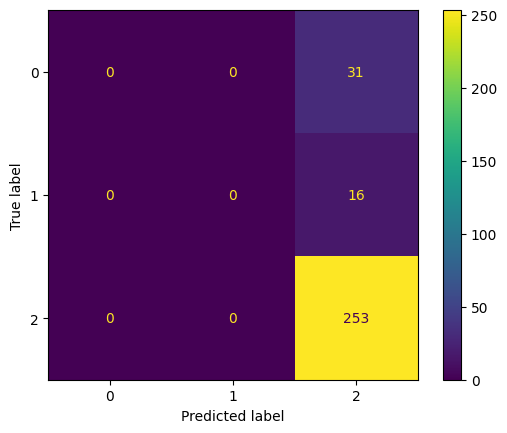

0.8433333333333334

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

accuracy_score(y_test, y_pred)


In [16]:
#Hyper-Parameter Tuning
#Try for different values of penalty for same solver='saga'

penalties = ['l1','l2','elasticnet',None]
Cs = np.linspace(0.001, 20, 25)
scores = []
for p in penalties:
    for c in Cs:
        lr = LogisticRegression(penalty=p, solver='saga', l1_ratio=0.5, C=c)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([p,c, accuracy_score(y_test, y_pred)])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: Use

In [17]:
df_scores = pd.DataFrame(scores, columns=['penalty','C','score'])
print("Best alpha and score:\n",df_scores.sort_values('score', ascending=False).iloc[0])

Best alpha and score:
 penalty          l1
C             0.001
score      0.843333
Name: 0, dtype: object


###2)Decision Tree Classification

In [18]:
dtc = DecisionTreeClassifier(random_state=25, max_depth=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=25)

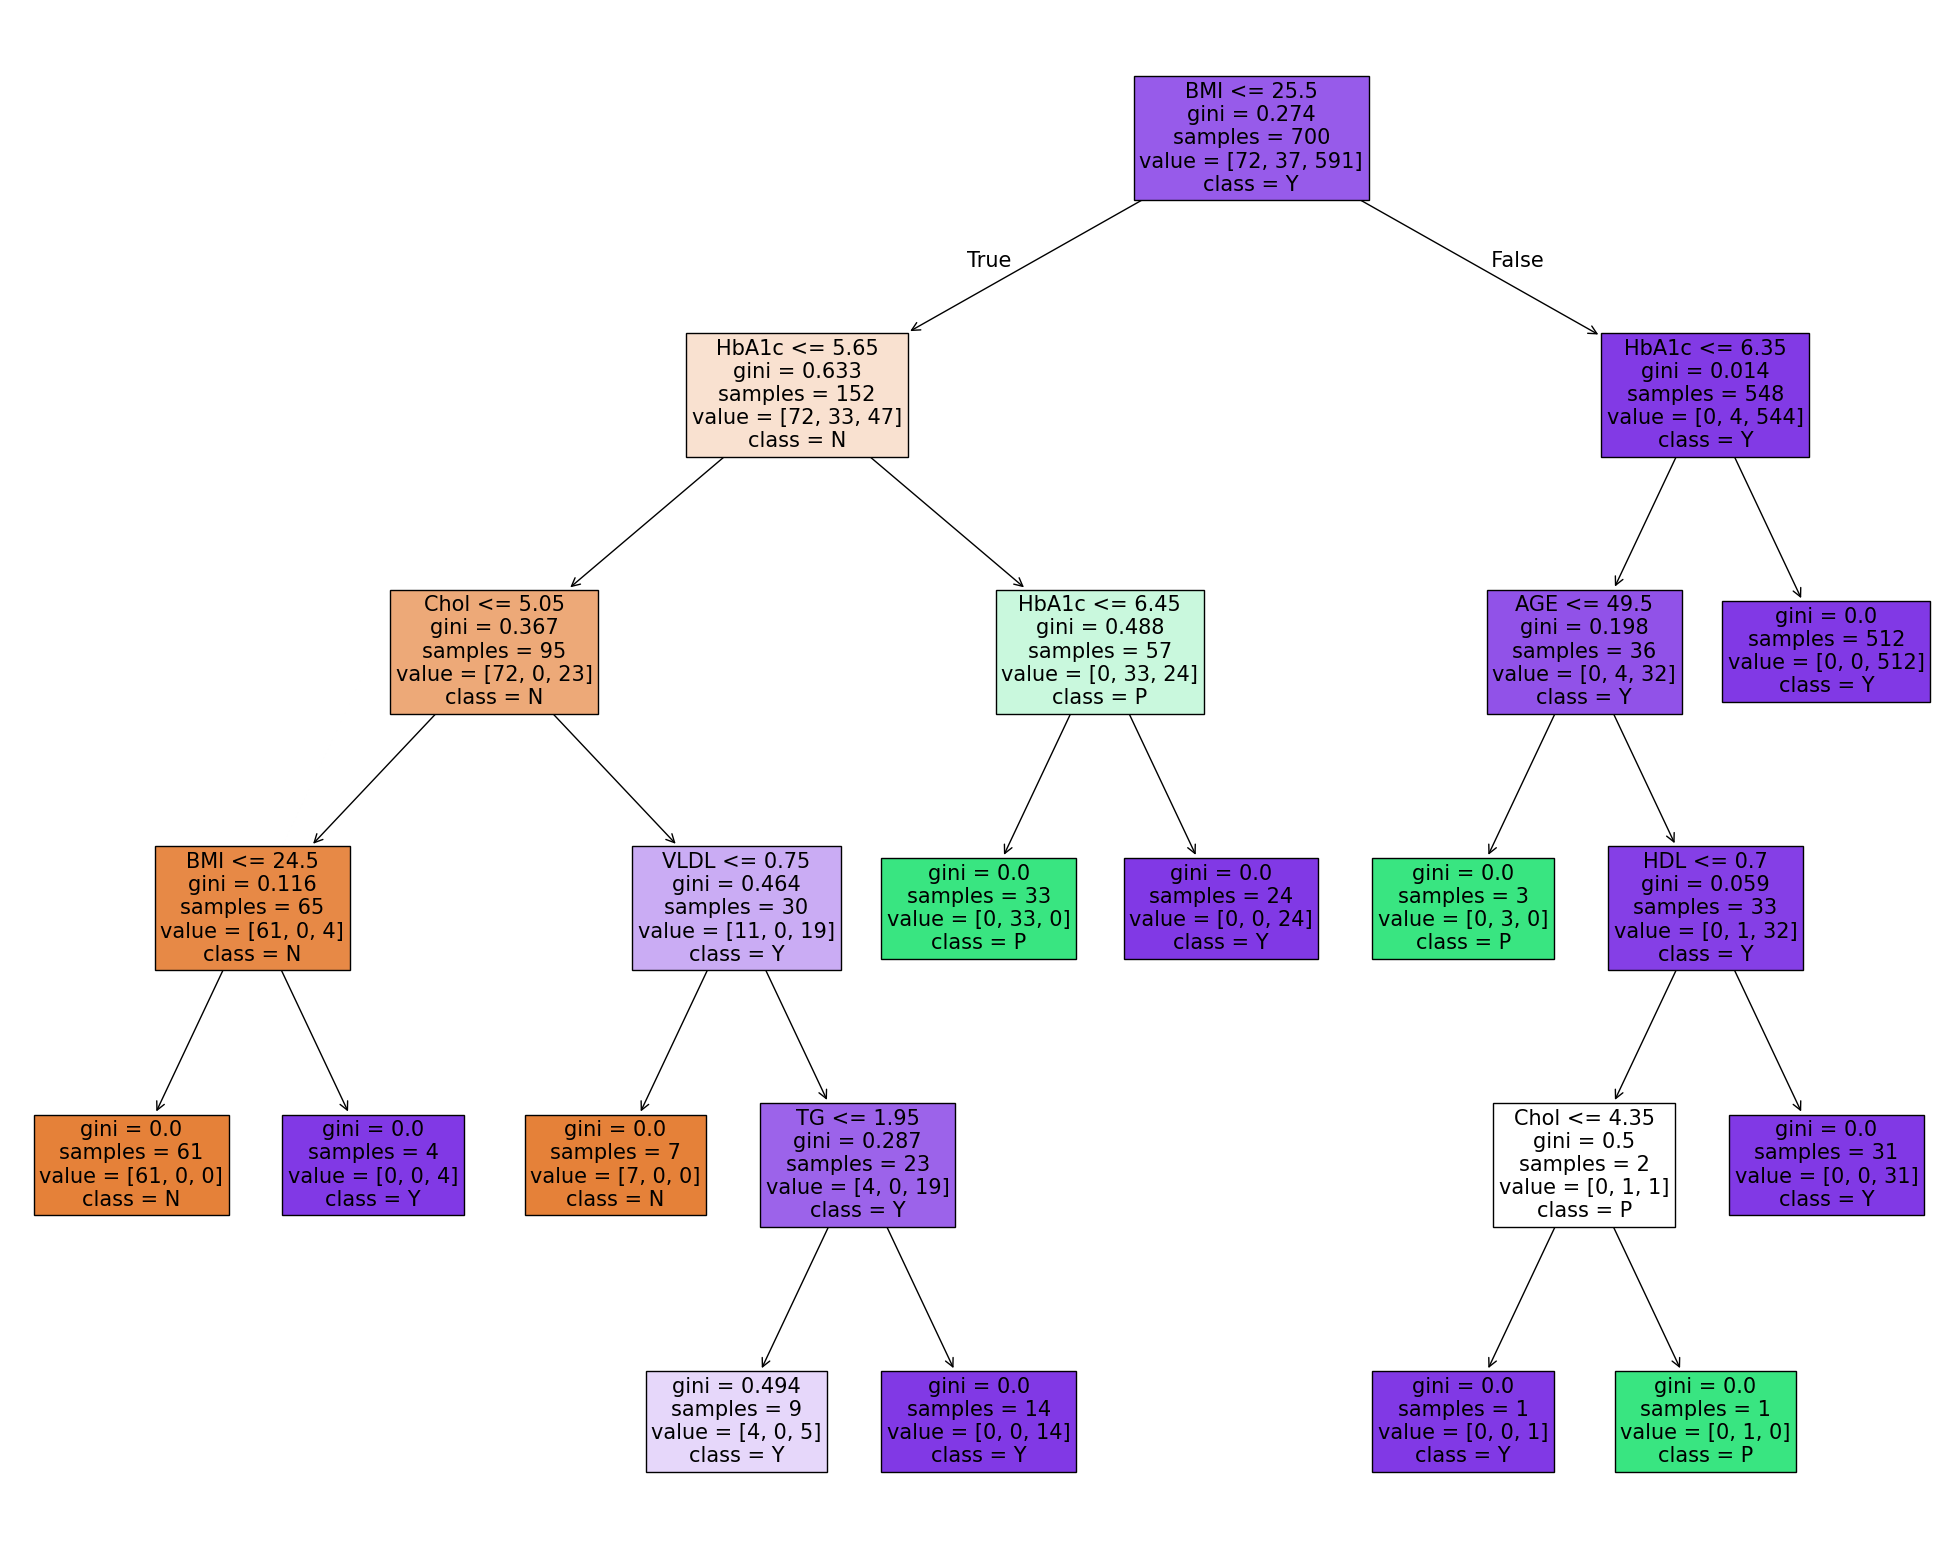

In [19]:
plt.figure(figsize=(25,20))
plot_tree(dtc,feature_names=list(X.columns), class_names=['N','P','Y'],  filled=True,fontsize=15)
plt.show()


In [20]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


0.9866666666666667
              precision    recall  f1-score   support

           N       0.91      0.97      0.94        31
           P       1.00      1.00      1.00        16
           Y       1.00      0.99      0.99       253

    accuracy                           0.99       300
   macro avg       0.97      0.99      0.98       300
weighted avg       0.99      0.99      0.99       300



In [21]:
depths = [3,4,5,6,7]
scores = []
for d in depths:
    dtc = DecisionTreeClassifier(random_state=25, max_depth=d)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    scores.append([d, accuracy_score(y_test, y_pred)])
df_clean_scores = pd.DataFrame(scores, columns=['Max Depth','score'])
print("Best Depth and score:\n",df_scores.sort_values('score', ascending=False).iloc[0])


Best Depth and score:
 penalty          l1
C             0.001
score      0.843333
Name: 0, dtype: object


In [22]:
leaves = [1,2,3,4,5,6]
splits = [2,3,4,5,6]
depths = [None, 2,3]
scores = []
for d in depths:
    for s in splits:
        for l in leaves:
            dtc = DecisionTreeClassifier(random_state=25, min_samples_leaf=l,
                                         min_samples_split=s, max_depth=d)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            scores.append([d,s,l,accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['Max Depth','Min Split','Min leaf','score'])


In [23]:
print("Best params and score:\n",df_scores.sort_values('score', ascending=False).iloc[0])

Best params and score:
 Max Depth         NaN
Min Split    2.000000
Min leaf     1.000000
score        0.986667
Name: 0, dtype: float64


In [24]:

from google.colab import data_table
data_table.enable_dataframe_formatter()

df_scores


,Max Depth,Min Split,Min leaf,score
0,NaN,2,1,0.986667
1,NaN,2,2,0.986667
2,NaN,2,3,0.986667
3,NaN,2,4,0.980000
4,NaN,2,5,0.976667
...,...,...,...,...
85,3.0,6,2,0.983333
86,3.0,6,3,0.983333
87,3.0,6,4,0.980000
88,3.0,6,5,0.980000


In [25]:
#Build the model with best parameters

best_tree = DecisionTreeClassifier(random_state=25, min_samples_leaf=2, min_samples_split=5, max_depth=None)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, random_state=25)

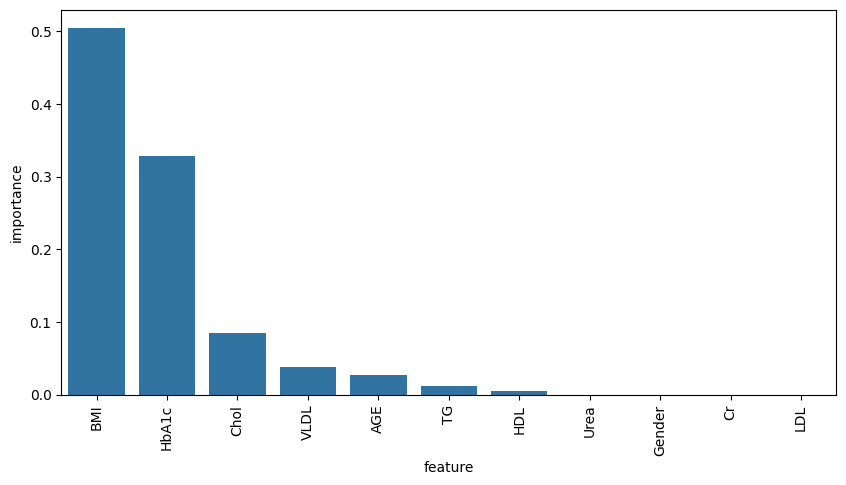

In [26]:
#### Feature Importances Plot

df_imp = pd.DataFrame({'feature': list(X.columns), 'importance': best_tree.feature_importances_})
df_imp = df_imp.sort_values('importance', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='feature', y='importance', data=df_imp)
plt.xticks(rotation=90)
plt.show()

## 3)Random Forest classifier

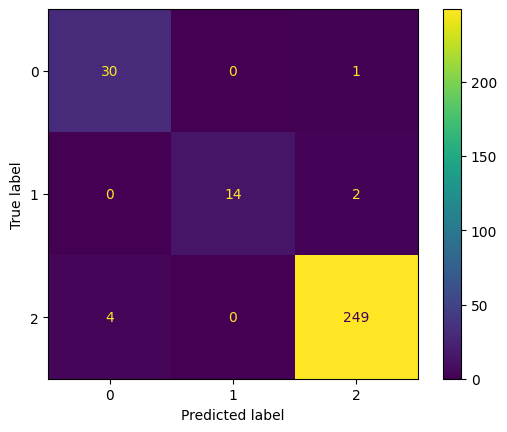

In [27]:
rf = RandomForestClassifier(random_state=25, n_estimators=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [28]:
accuracy_score(y_test, y_pred)

0.9766666666666667

In [29]:
X.shape

(1000, 11)

In [30]:
features = [3,4,5,6,7,8,9,10]
trees = [25, 50 , 100]
scores = []
for i in tqdm(range(len(features))):
    for t in trees:
        rf = RandomForestClassifier(random_state=25, n_estimators=t, max_features=features[i])
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([features[i], t, accuracy_score(y_test, y_pred)])


100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


In [31]:
df_scores = pd.DataFrame(scores, columns=['max_features','n_estimators','score'])
df_scores.sort_values('score',ascending=False)

,max_features,n_estimators,score
17,8,100,0.983333
2,3,100,0.980000
7,5,50,0.980000
5,4,100,0.980000
10,6,50,0.980000
11,6,100,0.980000
8,5,100,0.980000
14,7,100,0.980000
20,9,100,0.980000
21,10,25,0.980000


###4)XGBoost (Multiclass Classification)

In [32]:
X_train.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
942,0,61,3.8,32,10.3,3.4,0.8,1.4,1.6,0.8,32.0
426,1,62,4.1,63,9.5,3.6,5.1,0.9,2.5,0.9,30.0
823,1,55,3.8,66,10.2,4.3,3.3,0.6,2.4,1.5,31.0
575,1,61,7.8,89,10.9,4.9,1.7,1.0,3.2,0.7,31.0
255,1,73,4.3,79,6.0,5.3,1.4,1.5,3.2,0.6,27.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, le_y, test_size=0.3, random_state=25, stratify=y)

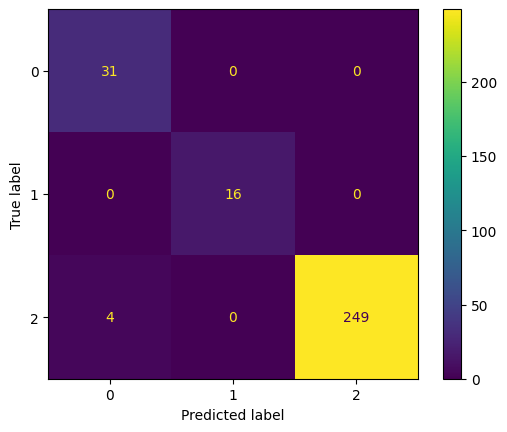

In [34]:
gbm = XGBClassifier(random_state=25)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [35]:

accuracy_score(y_test, y_pred)


0.9866666666666667

In [36]:
depths = [1,2,3,4, None]
l_rates = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8]
trees = [25, 50 ]
scores = []
for i in tqdm(range(len(l_rates))):
    for t in trees:
            for d in depths:
                gbm = XGBClassifier(random_state=25, learning_rate=l_rates[i],
                                                 n_estimators=t, max_depth=d)
                gbm.fit(X_train, y_train)
                y_pred = gbm.predict(X_test)
                scores.append([l_rates[i], t, d, accuracy_score(y_test, y_pred)])

df_scores = pd.DataFrame(scores, columns=['learning_rate','n_estimators','max_depth','score'])
df_scores.sort_values('score',ascending=False)

100%|██████████| 6/6 [00:02<00:00,  2.26it/s]


,learning_rate,n_estimators,max_depth,score
23,0.100,25,4.0,0.986667
22,0.100,25,3.0,0.986667
27,0.100,50,3.0,0.986667
24,0.100,25,NaN,0.986667
36,0.200,50,2.0,0.986667
37,0.200,50,3.0,0.986667
38,0.200,50,4.0,0.986667
34,0.200,25,NaN,0.986667
52,0.800,25,3.0,0.986667
53,0.800,25,4.0,0.986667


#### Feature Importance Plot

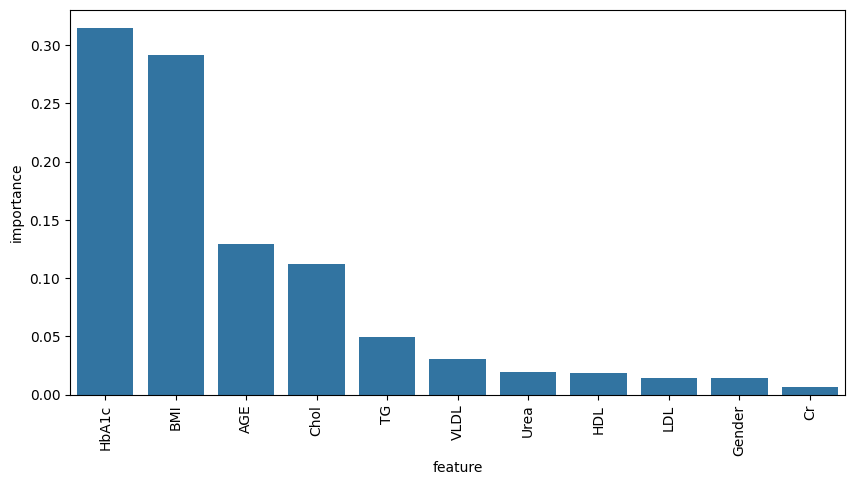

In [37]:
best_model = XGBClassifier(random_state=25,learning_rate=0.2,
                                        n_estimators=50, max_depth=3)
best_model.fit(X, le_y)

df_imp = pd.DataFrame({'feature': list(X.columns), 'importance': best_model.feature_importances_})
df_imp = df_imp.sort_values('importance', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='feature', y='importance', data=df_imp)
plt.xticks(rotation=90)
plt.show()


###5)LigthGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 11
[LightGBM] [Info] Start training from score -2.274414
[LightGBM] [Info] Start training from score -2.940162
[LightGBM] [Info] Start training from score -0.169264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

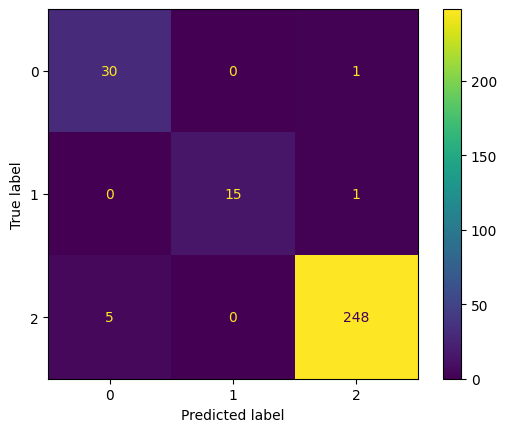

In [38]:
gbm = LGBMClassifier(random_state=25)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [39]:
accuracy_score(y_test, y_pred)

0.9766666666666667

In [40]:
depths = [1,2,3,4, None]
l_rates = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8]
trees = [25, 50 ]
scores = []
for i in tqdm(range(len(l_rates))):
    for t in trees:
            for d in depths:
                gbm = LGBMClassifier(random_state=25 , learning_rate=l_rates[i],
                                                  n_estimators=t, max_depth=d)
                gbm.fit(X_train, y_train)
                y_pred = gbm.predict(X_test)
                scores.append([l_rates[i], t, d, accuracy_score(y_test, y_pred)])


  0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 11
[LightGBM] [Info] Start training from score -2.274414
[LightGBM] [Info] Start training from score -2.940162
[LightGBM] [Info] Start training from score -0.169264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

 17%|█▋        | 1/6 [00:00<00:01,  3.86it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 11
[LightGBM] [Info] Start training from score -2.274414
[LightGBM] [Info] Start training from score -2.940162
[LightGBM] [Info] Start training from score -0.169264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

 33%|███▎      | 2/6 [00:00<00:01,  3.66it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 11
[LightGBM] [Info] Start training from score -2.274414
[LightGBM] [Info] Start training from score -2.940162
[LightGBM] [Info] Start training from score -0.169264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

 50%|█████     | 3/6 [00:00<00:00,  3.47it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 11
[LightGBM] [Info] Start training from score -2.274414
[LightGBM] [Info] Start training from score -2.940162
[LightGBM] [Info] Start training from score -0.169264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

 67%|██████▋   | 4/6 [00:01<00:00,  3.38it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 83%|████████▎ | 5/6 [00:01<00:00,  3.41it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████| 6/6 [00:01<00:00,  3.52it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [41]:
df_scores = pd.DataFrame(scores, columns=['learning_rate','n_estimators','max_depth','score'])
df_scores.sort_values('score',ascending=False)

,learning_rate,n_estimators,max_depth,score
48,0.500,50,4.0,0.980000
24,0.100,25,NaN,0.976667
22,0.100,25,3.0,0.976667
23,0.100,25,4.0,0.976667
43,0.500,25,4.0,0.976667
36,0.200,50,2.0,0.976667
42,0.500,25,3.0,0.976667
40,0.500,25,1.0,0.976667
32,0.200,25,3.0,0.976667
37,0.200,50,3.0,0.976667


### Feature Importance Plot

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 11
[LightGBM] [Info] Start training from score -2.273026
[LightGBM] [Info] Start training from score -2.937463
[LightGBM] [Info] Start training from score -0.169603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

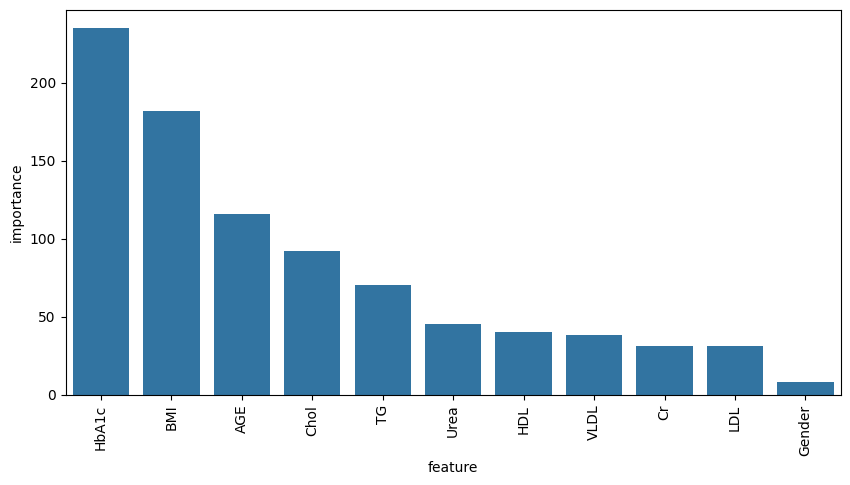

In [42]:
best_model = LGBMClassifier(random_state=25,learning_rate=0.2,
                                        n_estimators=50, max_depth=3)
best_model.fit(X, le_y)

df_imp = pd.DataFrame({'feature': list(X.columns), 'importance': best_model.feature_importances_})
df_imp = df_imp.sort_values('importance', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='feature', y='importance', data=df_imp)
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Model      	         Score
#Logistic Regression	0.8433
#Decision Tree       	0.9867 Highest
#Random Forest	      0.9833
#XGBoost	            0.9867 Tied Highest
#LightGBM            	0.9800

Best Model(s):
Decision Tree and XGBoost both have the highest score of 0.9867.

While both models tie in performance score, XGBoost generally offers better generalization and is less prone to overfitting compared to a single Decision Tree, especially when working with more complex data.

So:If we prioritize simplicity, go with Decision Tree.
If we want better robustness and scalability, choose XGBoost.